## DSaaS Demo

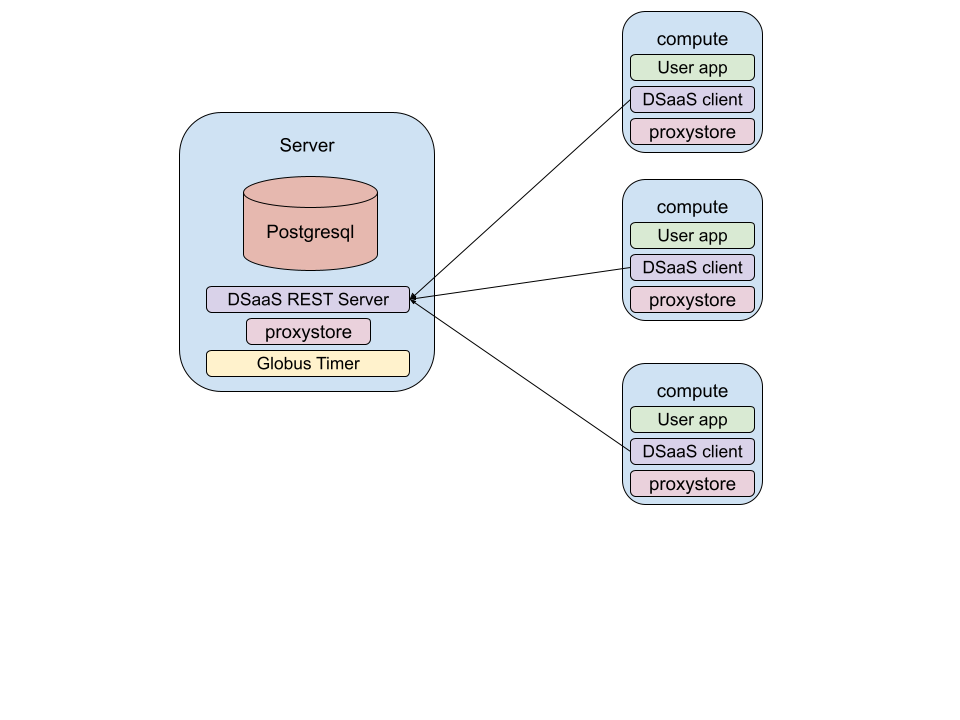

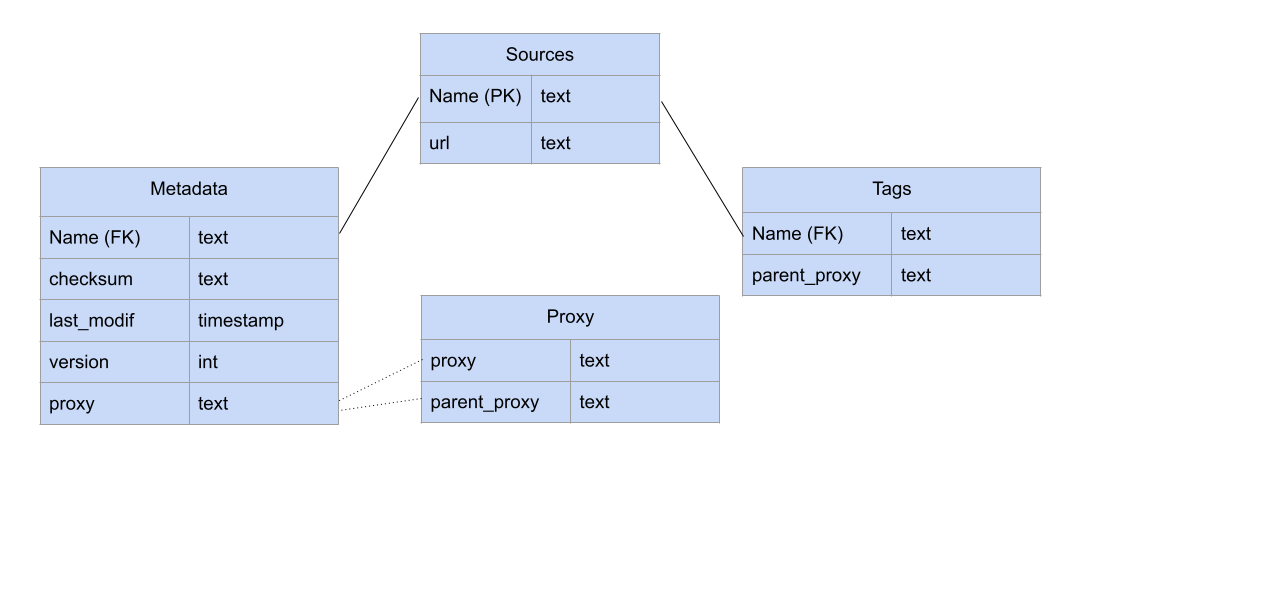

### Example 1: Obtaining a dataframe from the server

In [19]:
from osprey.client import get_proxy

# add get_data_as_proxy and rename get_proxy to get_data (resolve data immediately)  
table_name = 'COVID-19 Daily Cases, Deaths, and Hospitalizations'
df = get_proxy(table_name)
df

,lab_report_date,cases_total,deaths_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,...,hospitalizations_age_unknown,hospitalizations_female,hospitalizations_male,hospitalizations_unknown_gender,hospitalizations_latinx,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity
0,2023-05-31T00:00:00.000,1,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-30T00:00:00.000,25,0,5,2,4,2,5,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-29T00:00:00.000,30,0,1,4,3,2,3,9,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-05-28T00:00:00.000,32,0,7,3,6,2,1,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-27T00:00:00.000,33,0,4,5,3,5,5,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-09-08T00:00:00.000,369,1,36,120,80,55,40,23,10,...,0,7,14,0,11,0,5,4,0,1
996,2020-09-07T00:00:00.000,72,1,4,19,17,5,10,11,3,...,0,11,6,0,8,0,5,3,0,1
997,2020-09-06T00:00:00.000,143,2,16,44,30,17,18,10,3,...,0,7,4,0,4,0,5,2,0,0
998,2020-09-05T00:00:00.000,203,3,23,61,40,34,21,17,6,...,0,13,8,0,7,0,7,7,0,0


### Example 2: Obtaining all available metadata from server

In [26]:
from osprey.client import get_metadata
from pandas import DataFrame

DataFrame(get_metadata(""))

,tn,checksum,last_modif,version,proxy,tag,parent_proxy
0,"COVID-19 Daily Cases, Deaths, and Hospitalizat...",7871947931ca6abd468d8ca2bb509f4c,2023-06-01 22:15:12,1,FileKey(filename='1beb1563-7f63-4310-b67a-ed20...,health,None
1,"COVID-19 Daily Cases, Deaths, and Hospitalizat...",7871947931ca6abd468d8ca2bb509f4c,2023-06-01 22:15:12,1,FileKey(filename='1beb1563-7f63-4310-b67a-ed20...,COVID-19,None
2,COVID-19 Wastewater Detection,feb563bd25f4a3640386e4fc242a77ce,2023-05-31 22:23:08,1,FileKey(filename='23bdc4ee-2364-4c5c-ae22-30a4...,water,None
3,COVID-19 Wastewater Detection,feb563bd25f4a3640386e4fc242a77ce,2023-05-31 22:23:08,1,FileKey(filename='23bdc4ee-2364-4c5c-ae22-30a4...,COVID-19,None


## View of the Databases 

In [24]:
import psycopg
with psycopg.connect(f'dbname=osprey user=valeriehayot-sasson', row_factory=psycopg.rows.namedtuple_row) as conn:
    with conn.cursor() as cur:
        cur.execute('''SELECT * FROM source''')
        data = cur.fetchall()
DataFrame(data)

,name,url
0,COVID-19 Wastewater Detection,https://data.cityofchicago.org/resource/urdi-w...
1,"COVID-19 Daily Cases, Deaths, and Hospitalizat...",https://data.cityofchicago.org/resource/naz8-j...


In [25]:
with psycopg.connect(f'dbname=osprey user=valeriehayot-sasson', row_factory=psycopg.rows.namedtuple_row) as conn:
    with conn.cursor() as cur:
        cur.execute('''SELECT * FROM metadata''')
        data = cur.fetchall()
DataFrame(data)

,name,url,checksum,last_modif,version,proxy
0,"COVID-19 Daily Cases, Deaths, and Hospitalizat...",https://data.cityofchicago.org/resource/naz8-j...,7871947931ca6abd468d8ca2bb509f4c,2023-06-01 22:15:12,1,FileKey(filename='1beb1563-7f63-4310-b67a-ed20...
1,COVID-19 Wastewater Detection,https://data.cityofchicago.org/resource/urdi-w...,feb563bd25f4a3640386e4fc242a77ce,2023-05-31 22:23:08,1,FileKey(filename='23bdc4ee-2364-4c5c-ae22-30a4...


In [16]:
with psycopg.connect(f'dbname=osprey user=valeriehayot-sasson', row_factory=psycopg.rows.namedtuple_row) as conn:
    with conn.cursor() as cur:
        cur.execute('''SELECT * FROM provenance''')
        data = cur.fetchall()
DataFrame(data)

""


In [17]:
with psycopg.connect(f'dbname=osprey user=valeriehayot-sasson', row_factory=psycopg.rows.namedtuple_row) as conn:
    with conn.cursor() as cur:
        cur.execute('''SELECT * FROM tags''')
        data = cur.fetchall()
DataFrame(data)

,name,tag
0,"COVID-19 Daily Cases, Deaths, and Hospitalizat...",COVID-19
1,COVID-19 Wastewater Detection,COVID-19
2,"COVID-19 Daily Cases, Deaths, and Hospitalizat...",health
3,COVID-19 Wastewater Detection,water


In [ ]:
# add derived_from in provenance table or create another table
# rename parent_proxy to previous_version or last_version
# example to compare table headings to determine if format has changed
# add text description of data to sources table (happens once)
# timers per source
# rename functions to reflect streams (snapshot, instance)
# python cli for user interface to add sources